In [1]:
# Import all necessary libraries
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Set variables to call APIs
company_summary_base_url = 'https://api.census.gov/data/2018/abscs'
business_char_base_url = 'https://api.census.gov/data/2018/abscb'
owner_char_base_url = 'https://api.census.gov/data/2018/abscbo'
api_key = 'key=54fdac0557ae012c182506724253e238427a8b27'
state = 'for=state:*'
country = 'for=us:*'
metro = 'for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*'

In [3]:
# Company summary to dataframe
variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,RCPSZFI,YIBSZFI'

# country, state, or metro options
region = f'get={variables}&{state}'

# call API with URL built from variables
response = requests.get(f'{company_summary_base_url}?{region}&{api_key}')
comp_summary_text = response.json()

In [4]:
comp_summary_df = pd.DataFrame(comp_summary_text[1:], columns=comp_summary_text[0])
comp_summary_df = comp_summary_df[(comp_summary_df['NAICS2017']=='62')]
# healthcare and social assistance

comp_summary_df.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,RCPSZFI,YIBSZFI,state
4764,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,14.8,None,10.9,None,001,001,28
4765,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,0.0,None,15.4,None,001,001,28
4766,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,14.0,None,21.9,None,001,001,28
4767,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,None,0.0,S,30.7,None,44.7,None,001,001,28
4768,0400000US28,Mississippi,62,Health care and social assistance,001,Total,001,Total,00,Total,...,S,0.0,S,0.0,S,0.0,S,001,001,28


In [5]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [6]:
comp_summary_health_df = comp_summary_df[['NAME','EMP','PAYANN']]
comp_summary_health_df['Code'] = comp_summary_health_df['NAME'].map(code)
comp_summary_health_df.head()

<ipython-input-6-91ec363bf411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_summary_health_df['Code'] = comp_summary_health_df['NAME'].map(code)


,NAME,EMP,PAYANN,Code
4764,Mississippi,148263,6150851,MS
4765,Mississippi,0,42063,MS
4766,Mississippi,4981,229628,MS
4767,Mississippi,7390,294276,MS
4768,Mississippi,0,0,MS


In [7]:
comp_summary_health_df['EMP'] = comp_summary_health_df['EMP'].astype(int)
comp_summary_health_df['PAYANN'] = comp_summary_health_df['PAYANN'].astype(int)

num_employees = comp_summary_health_df.groupby('Code')[['EMP']].sum()
payann_employees = comp_summary_health_df.groupby('Code')[['PAYANN']].sum()

num_employees = num_employees.reset_index()
payann_employees = payann_employees.reset_index()

num_employees = num_employees.merge(payann_employees, how='inner', on='Code')
num_employees.head()

<ipython-input-7-bbe9e9582c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_summary_health_df['EMP'] = comp_summary_health_df['EMP'].astype(int)
<ipython-input-7-bbe9e9582c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_summary_health_df['PAYANN'] = comp_summary_health_df['PAYANN'].astype(int)


,Code,EMP,PAYANN
0,AK,621968,38551256
1,AL,3870785,190353496
2,AR,2962036,125454308
3,AZ,7516773,332202542
4,CA,39752544,2029024461


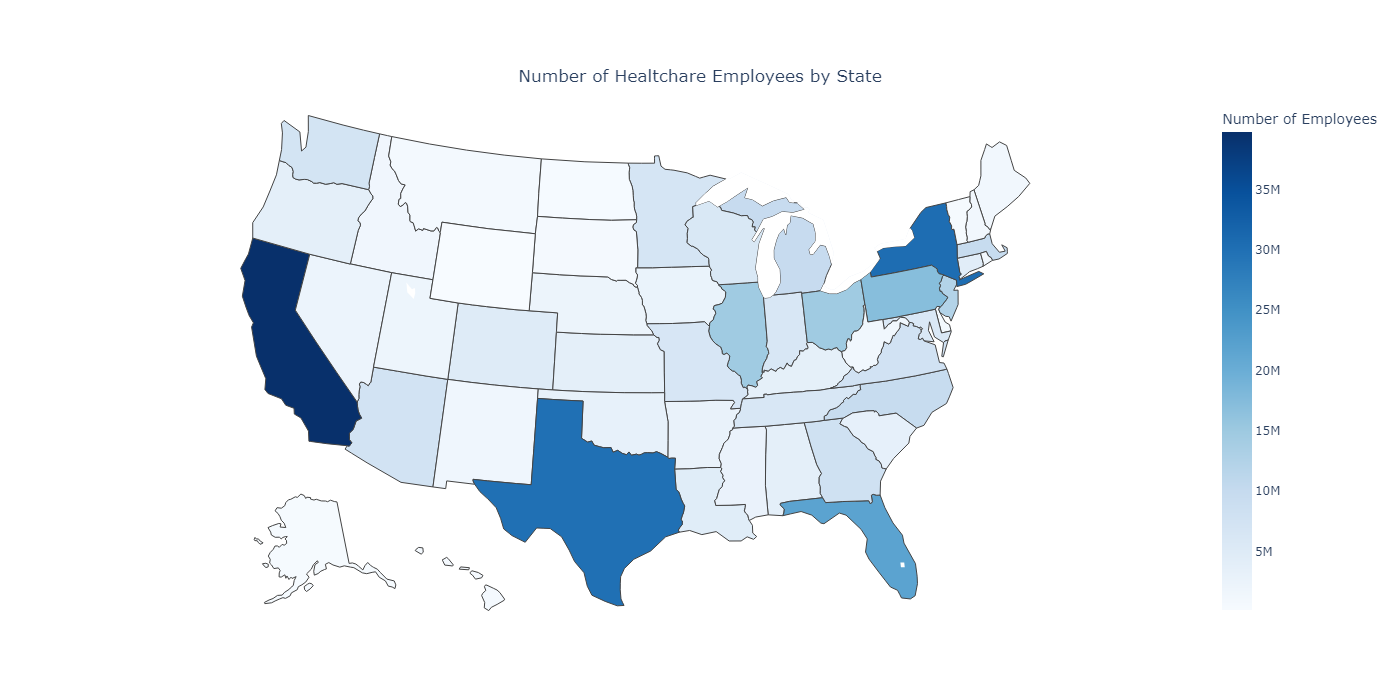

,Code,EMP,PAYANN
0,AK,621968,38551256
1,AL,3870785,190353496
2,AR,2962036,125454308
3,AZ,7516773,332202542
4,CA,39752544,2029024461


In [67]:
fig = px.choropleth(num_employees,
    locations='Code', 
    color='EMP', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'EMP':'Number of Employees'},
    title = 'Number of Healtchare Employees by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
#fig.write_image("healthcare_employees.png", height=700, width=1400) 

num_employees.head(3)

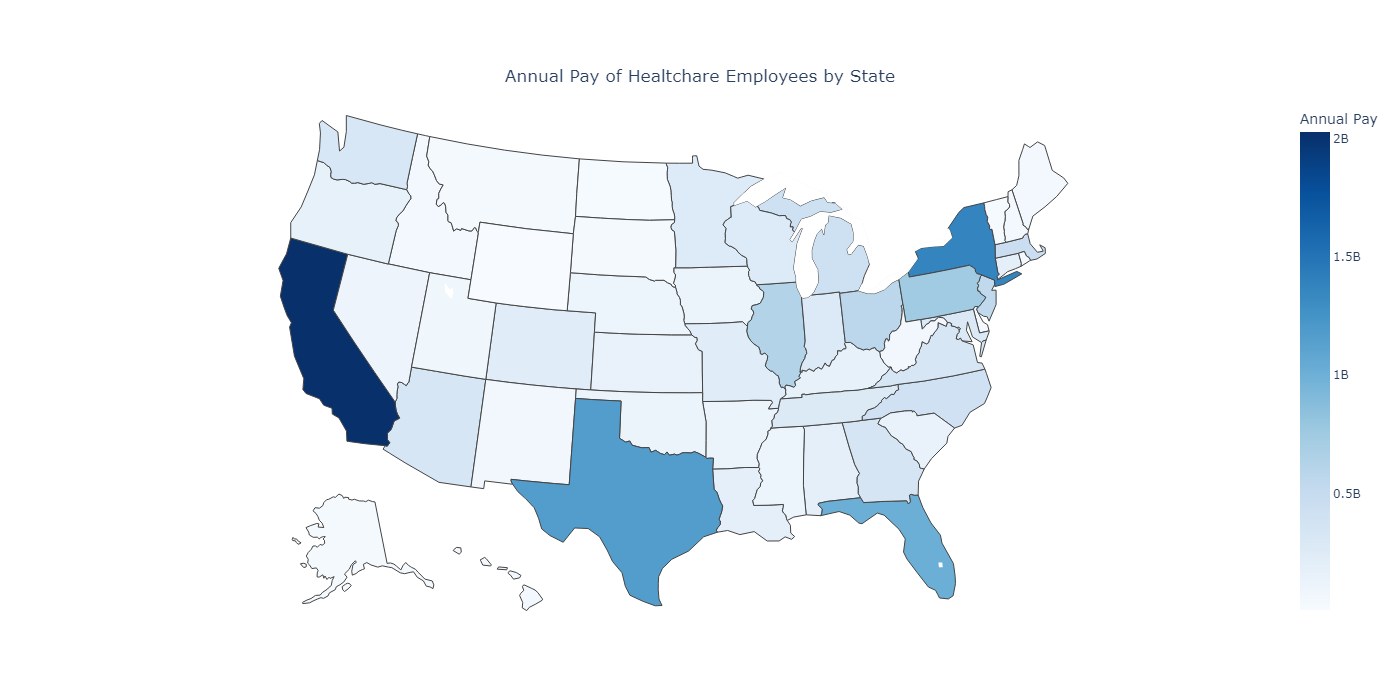

In [38]:
fig = px.choropleth(num_employees,
    locations='Code', 
    color='PAYANN', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'PAYANN':'Annual Pay'},
    title = 'Annual Pay of Healtchare Employees by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
#fig.write_image("healthcare_pay.png", height=700, width=1400) 

In [10]:
hospitals = pd.read_csv('../Capstone Files/HospitalStatisticsCleaned.csv')
population = pd.read_csv('../Capstone Files/Death Rates, 2015-2019 Averaged.csv')
poverty = pd.read_csv('../Capstone Files/Merged Files/Poverty_Hospitals_Mortality_Insurance.csv')

hospitals['Code'] = hospitals['State'].map(code)
population['Code'] = population['State'].map(code)
poverty['Code'] = poverty['State'].map(code)

population = population.drop(columns='State')
poverty = poverty.drop(columns='State')

poverty.head()

,Deaths,Population,Crude Rate,Number_of_Hospitals,Staffed_Beds,Total_Discharges,Patient_Days,Gross_Patient_Revenue($),Employer Insurance,Non-Group Insurance,Medicaid Insurance,Medicare Insurance,Military Insurance,Uninsured,Average of All_Ages_SAIPE_Poverty_Universe,Average of All_Ages_in_Poverty_Count,Average of All_Ages_in_Poverty_Percent,Average of Median_Household_Income_in_Dollars,Code
0,266073,24388082,1091.0,90,15127,577473,2768330,63612420,0.4674,0.0598,0.1996,0.1554,0.0204,0.0976,4755140.2,808309.8,17.00,48197.4,AL
1,22287,3689104,604.1,10,1274,45131,243451,5881291,0.4726,0.0398,0.2074,0.0876,0.0596,0.1328,719958.4,75908.4,10.52,75141.6,AK
2,288220,35225769,818.2,78,13774,609674,2727388,86444904,0.4422,0.0600,0.2224,0.1540,0.0158,0.1056,6885729.4,1048566.8,15.26,56513.6,AZ
3,161185,15002360,1074.4,51,8011,316530,1388729,28471124,0.4176,0.0622,0.2656,0.1538,0.0154,0.0856,2911377.8,494977.0,17.00,45696.4,AR
4,1328284,197000756,674.3,339,73849,3045511,14096066,457437847,0.4692,0.0728,0.2634,0.1082,0.0098,0.0762,38651294.2,5224283.8,13.54,71931.2,CA


In [11]:
hospitals_employees = hospitals.merge(num_employees, how='inner',on='Code')
hospitals_deaths = hospitals_employees.merge(population, how='inner',on='Code')

hospitals_deaths['Hospitals_per_100'] = hospitals_deaths.Number_of_Hospitals / (hospitals_deaths.Population/100000)
hospitals_deaths['Beds_per_100'] = hospitals_deaths.Staffed_Beds / (hospitals_deaths.Population/100000)
hospitals_deaths['Employees_per_100'] = hospitals_deaths.EMP / (hospitals_deaths.Population/100000)
hospitals_deaths['Payann_per_Employee'] = hospitals_deaths.PAYANN / (hospitals_deaths.EMP)
hospitals_deaths['Revenue_per_Patient'] = hospitals_deaths['Gross_Patient_Revenue($)'] / (hospitals_deaths.Patient_Days)

to_correlate = hospitals_deaths.loc[:,['Code','Hospitals_per_100', 'Beds_per_100', 'Employees_per_100', 'Payann_per_Employee', 'Revenue_per_Patient', 'Crude Rate']]


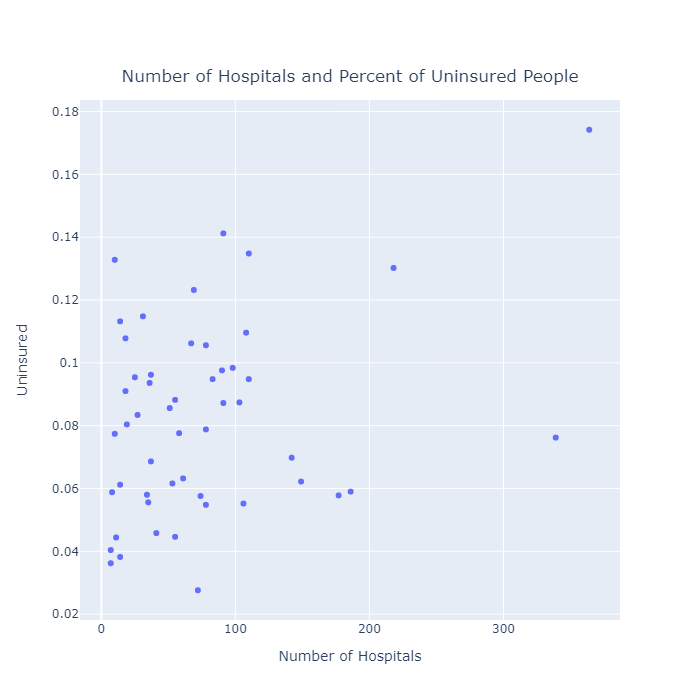

In [12]:
import seaborn as sns
poverty = poverty.loc[:,['Number_of_Hospitals','Average of All_Ages_in_Poverty_Percent','Uninsured']]
fig = px.scatter(poverty, x='Number_of_Hospitals', y='Uninsured', labels={'Average of All_Ages_in_Poverty_Percent':'Poverty Percent', 'Number_of_Hospitals': 'Number of Hospitals'}, title='Number of Hospitals and Percent of Uninsured People')
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=700)

fig.write_image("hospital_insurance.png") 


In [70]:
hospitals_deaths.head()

,State,Number_of_Hospitals,Staffed_Beds,Total_Discharges,Patient_Days,Gross_Patient_Revenue($),Code,EMP,PAYANN,Deaths,Population,Crude Rate,Hospitals_per_100,Beds_per_100,Employees_per_100,Payann_per_Employee,Revenue_per_Patient
0,Alaska,10,1274,45131,243451,5881291,AK,621968,38551256,22287,3689104,604.1,0.271069,34.534131,16859.595175,61.982700,24.158007
1,Alabama,90,15127,577473,2768330,63612420,AL,3870785,190353496,266073,24388082,1091.0,0.369033,62.026198,15871.625329,49.176975,22.978626
2,Arkansas,51,8011,316530,1388729,28471124,AR,2962036,125454308,161185,15002360,1074.4,0.339947,53.398265,19743.800309,42.354079,20.501569
3,Arizona,78,13774,609674,2727388,86444904,AZ,7516773,332202542,288220,35225769,818.2,0.221429,39.102056,21338.847138,44.194835,31.695125
4,California,339,73849,3045511,14096066,457437847,CA,39752544,2029024461,1328284,197000756,674.3,0.172081,37.486658,20178.878907,51.041374,32.451455


In [74]:
#hospitals_deaths.sort_values(by='Beds_per_100', ascending=False)

,State,Number_of_Hospitals,Staffed_Beds,Total_Discharges,Patient_Days,Gross_Patient_Revenue($),Code,EMP,PAYANN,Deaths,Population,Crude Rate,Hospitals_per_100,Beds_per_100,Employees_per_100,Payann_per_Employee,Revenue_per_Patient
36,Oklahoma,91,38521,402418,1877127,50197617,OK,3242913,132132596,201013,19665813,1022.1,0.462732,195.877994,16490.103918,40.745033,26.741727
25,Mississippi,69,10059,307165,1466484,35991598,MS,2800453,115775296,161069,14927838,1079.0,0.462224,67.384172,18759.936971,41.341632,24.542783
18,Louisiana,110,15118,505577,2441485,60177458,LA,4625844,197323080,225812,23345495,967.3,0.471183,64.757676,19814.718000,42.656665,24.647892
41,South Dakota,25,2777,94506,393132,12351569,SD,811325,41287286,39813,4360483,913.0,0.573331,63.685605,18606.310356,50.888714,31.418376
7,District of Columbia,7,2179,89404,584481,12958215,DC,703965,41641160,24808,3455574,717.9,0.202571,63.057541,20371.868755,59.152316,22.170464
1,Alabama,90,15127,577473,2768330,63612420,AL,3870785,190353496,266073,24388082,1091.0,0.369033,62.026198,15871.625329,49.176975,22.978626
17,Kentucky,74,13455,530366,2452724,59500313,KY,3700931,167245348,240300,22252330,1079.9,0.332549,60.465578,16631.656101,45.190075,24.258870
49,West Virginia,34,5463,203900,1047450,19993032,WV,1480678,63548390,115642,9089066,1272.3,0.374076,60.105186,16290.760789,42.918440,19.087338
34,New York,186,57384,2164933,11700708,269401406,NY,30439666,1378953036,776902,98386249,789.6,0.189051,58.325224,30938.943510,45.301188,23.024368
42,Tennessee,98,18707,765510,3654804,91168184,TN,6419942,276554820,347536,33566661,1035.4,0.291956,55.730893,19125.947618,43.077464,24.944753


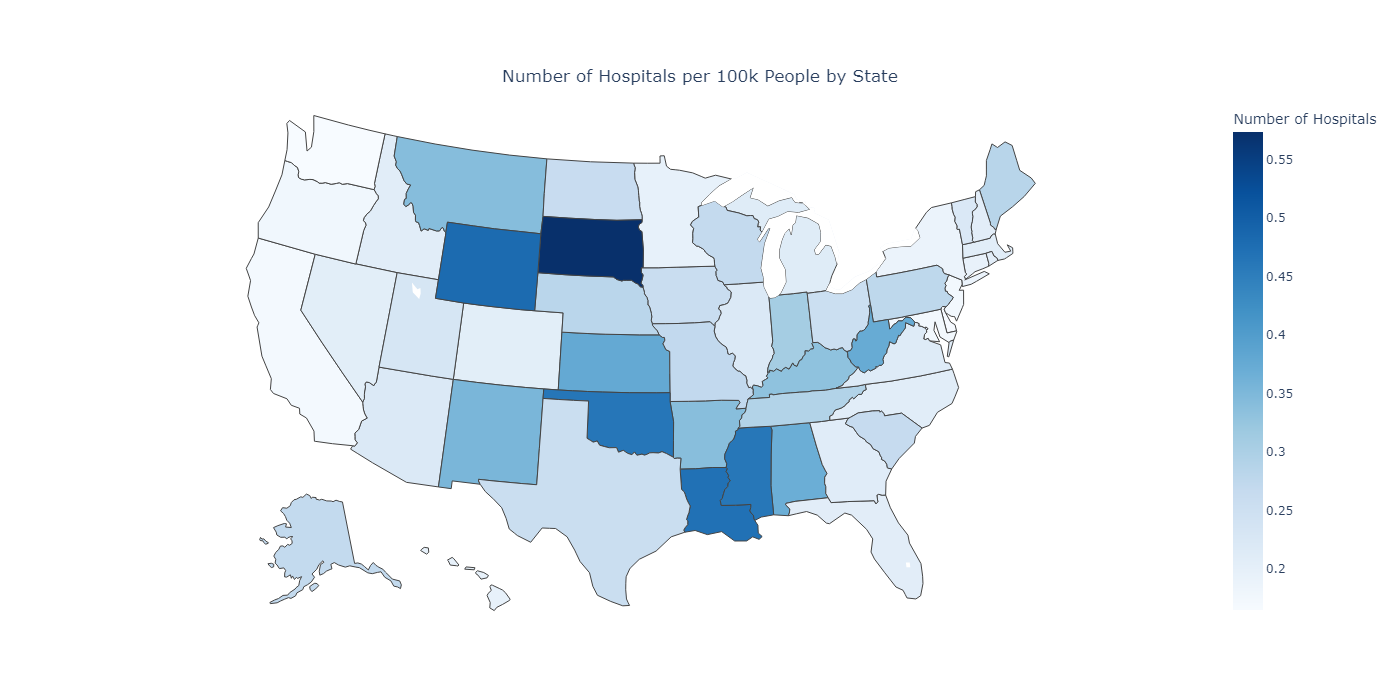

In [75]:
fig = px.choropleth(hospitals_deaths,
    locations='Code', 
    color='Hospitals_per_100', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'Hospitals_per_100':'Number of Hospitals'},
    title = 'Number of Hospitals per 100k People by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
fig.write_image("hospitals.png", height=700, width=1400) 


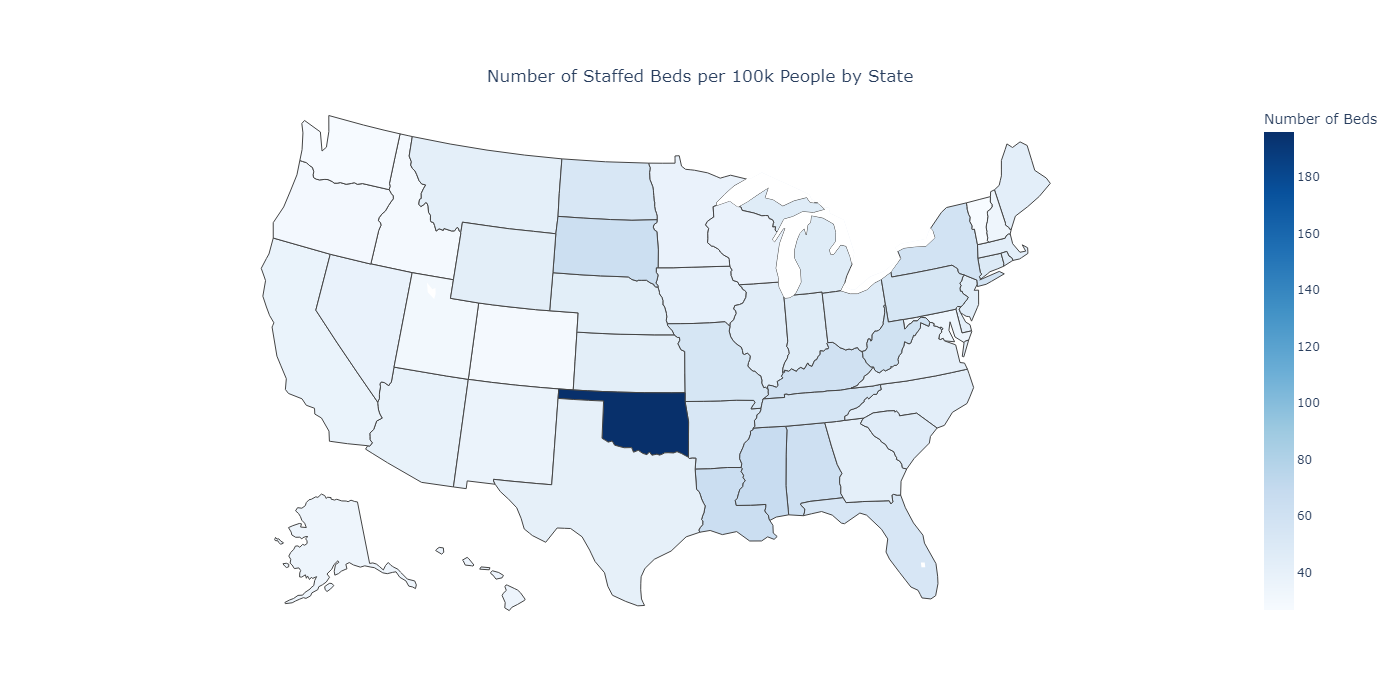

In [40]:
fig = px.choropleth(hospitals_deaths,
    locations='Code', 
    color='Beds_per_100', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'Beds_per_100':'Number of Beds'},
    title = 'Number of Staffed Beds per 100k People by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
fig.write_image("beds.png", height=700, width=1400) 

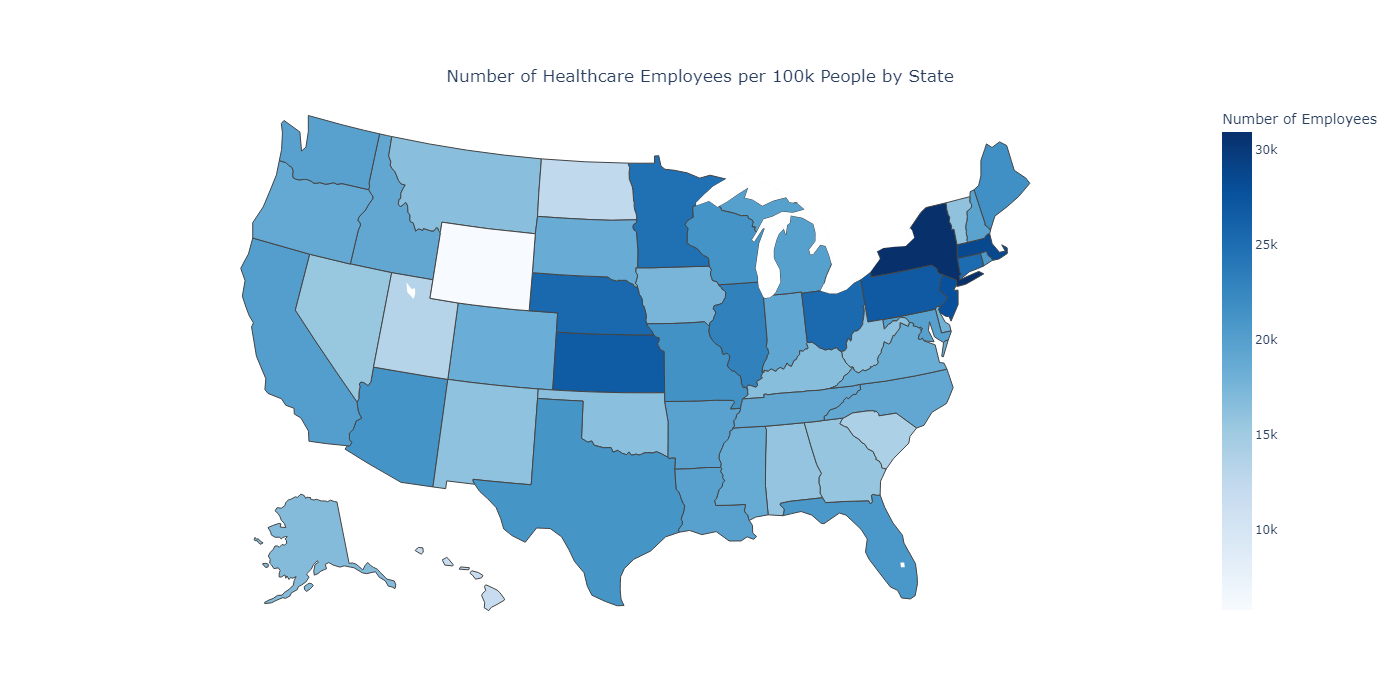

In [41]:
fig = px.choropleth(hospitals_deaths,
    locations='Code', 
    color='Employees_per_100', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'Employees_per_100':'Number of Employees'},
    title = 'Number of Healthcare Employees per 100k People by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
fig.write_image("employees.png", height=700, width=1400) 

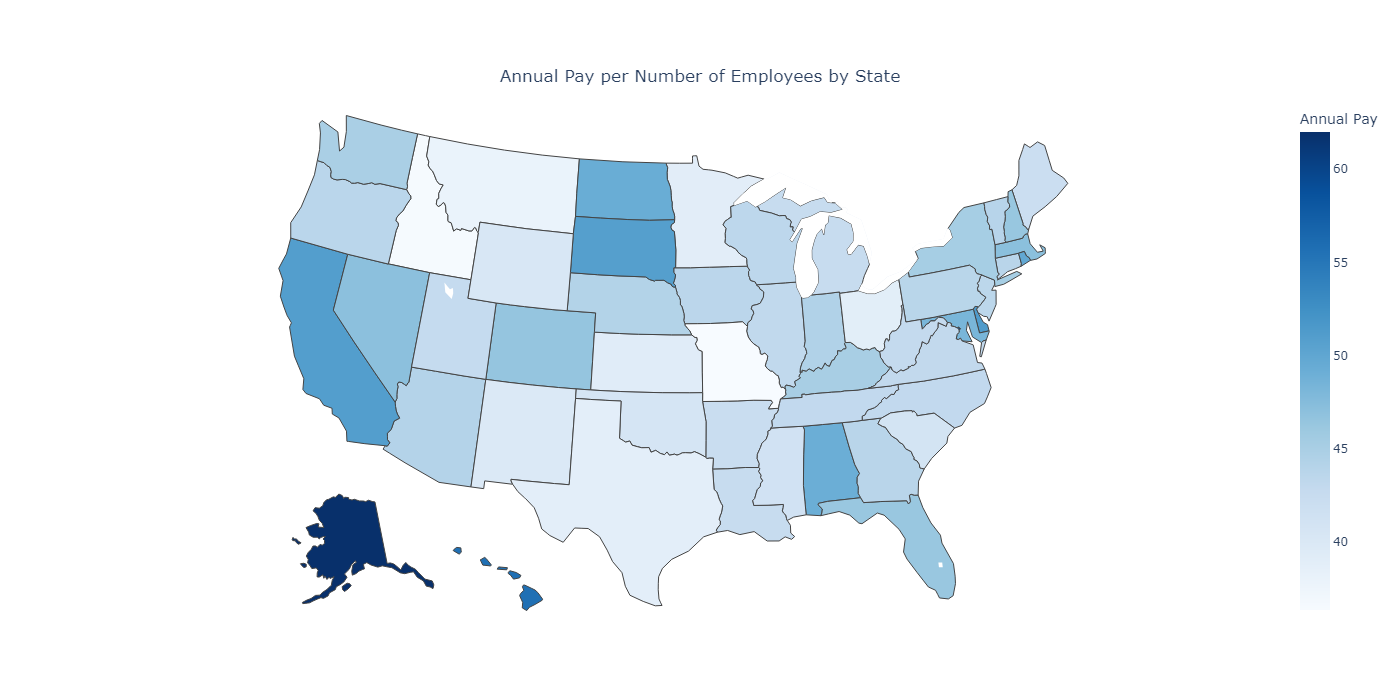

In [42]:
fig = px.choropleth(hospitals_deaths,
    locations='Code', 
    color='Payann_per_Employee', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'Payann_per_Employee':'Annual Pay'},
    title = 'Annual Pay per Number of Employees by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
fig.write_image("pay_per_employees.png", height=700, width=1400) 

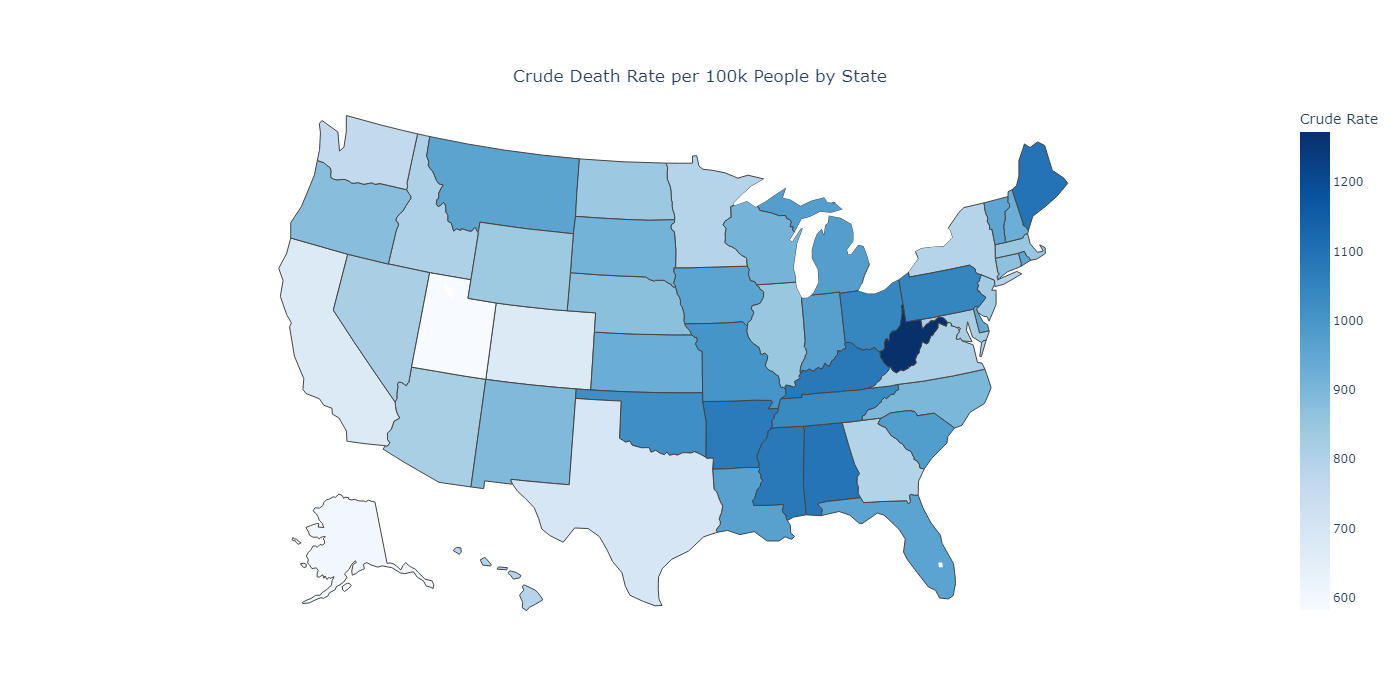

In [43]:
fig = px.choropleth(hospitals_deaths,
    locations='Code', 
    color='Crude Rate', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code'},
    title = 'Crude Death Rate per 100k People by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
fig.write_image("mortality.png", height=700, width=1400) 

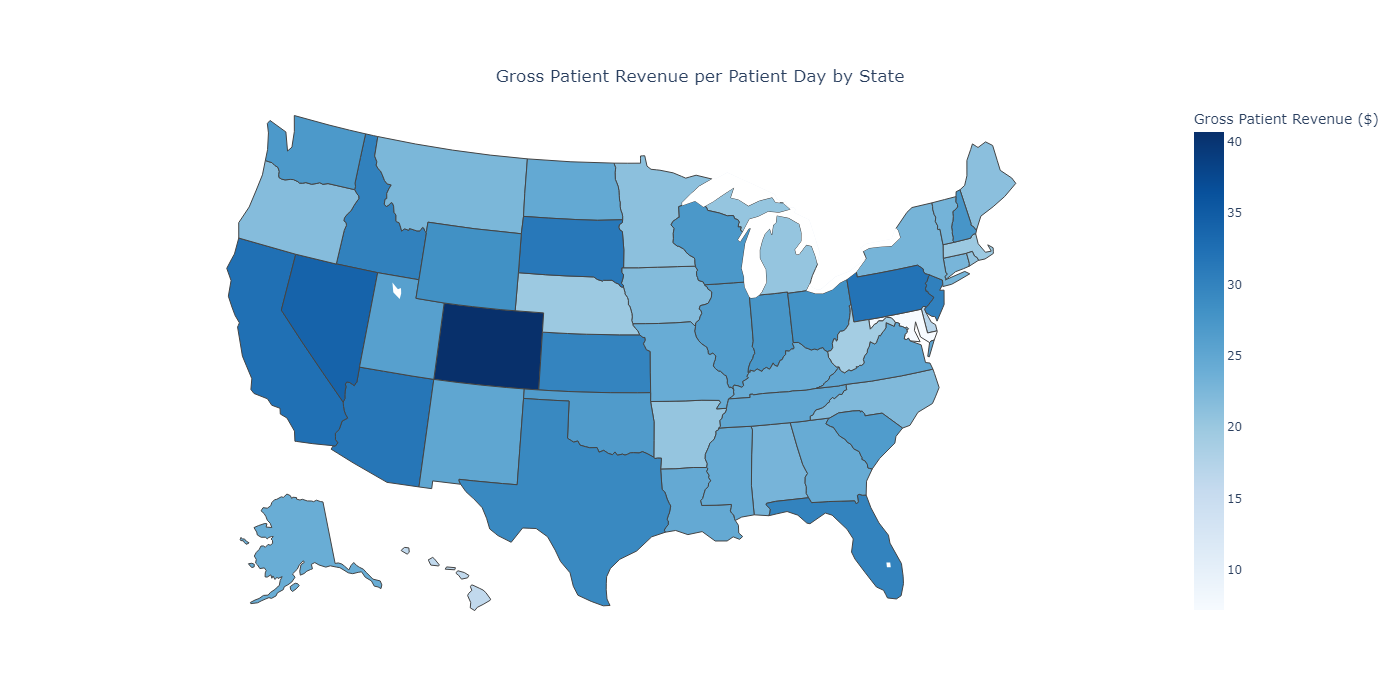

In [44]:
fig = px.choropleth(hospitals_deaths,
    locations='Code', 
    color='Revenue_per_Patient', 
    color_continuous_scale='blues',
    locationmode="USA-states",
    hover_name='Code',
    scope='usa',
    labels={'Code':'Code', 'Revenue_per_Patient':'Gross Patient Revenue ($)'},
    title = 'Gross Patient Revenue per Patient Day by State'
)

fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 500)
fig.show(renderer='png', height=700, width=1400)
fig.write_image("revenue.png", height=700, width=1400) 